## Linear Regression (1 feature)

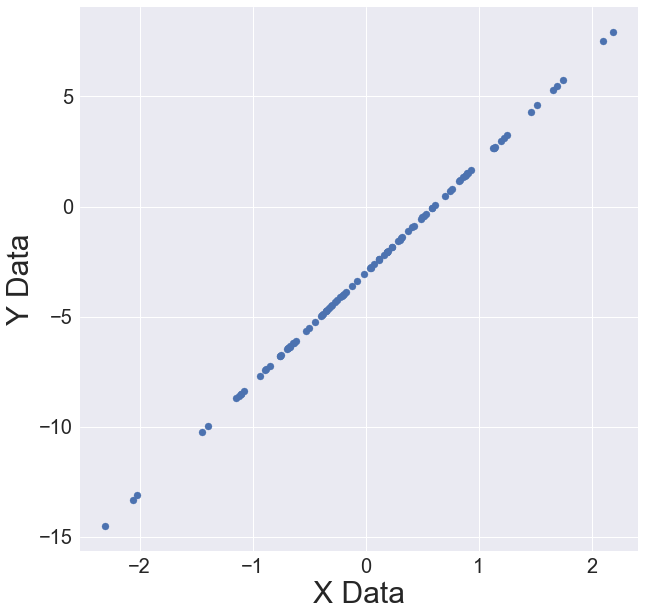

In [16]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
plt.style.use('seaborn')

# set params
n_data = 100
lr = 0.01
t_w, t_b = 5, -3
w, b = np.random.uniform(-3, 3, 2) # initial weight, bias

# generate dataset
x_data = np.random.randn(n_data, )
y_data = t_w*x_data + t_b
# y_data = t_w*x_data + t_b + np.random.randn(n_data, ) # noise 추가


# visualize dataset
cmap = plt.get_cmap('rainbow', lut=n_data)
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_data, y_data)
ax.set_xlabel('X Data', fontsize=30)
ax.set_ylabel('Y Data', fontsize=30)
ax.tick_params(labelsize=20)



In [17]:
# set x range for visualization of model
x_range = np.array([x_data.min(), x_data.max()])

# train model and visualize updated model
J_track = list()
w_track, b_track = list(), list()

for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
    
    w_track.append(w)
    b_track.append(b)
 
    # visualize updated model
    y_range = w*x_range + b
    ax.plot(x_range, y_range, color=cmap(data_idx), alpha=0.5)
    
    # loss calculation
    pred = x*w + b
    J = (y - pred)**2
    J_track.append(J)
    
    # jacobians
    dJ_dpred = -2*(y - pred)
    dpred_dw = x
    dpred_db = 1
    
    # backpropagation
    dJ_dw = dJ_dpred * dpred_dw
    dJ_db = dJ_dpred * dpred_db

    w = w - 2*lr*dJ_dw
    b = b - 2*lr*dJ_db
    

### visualize

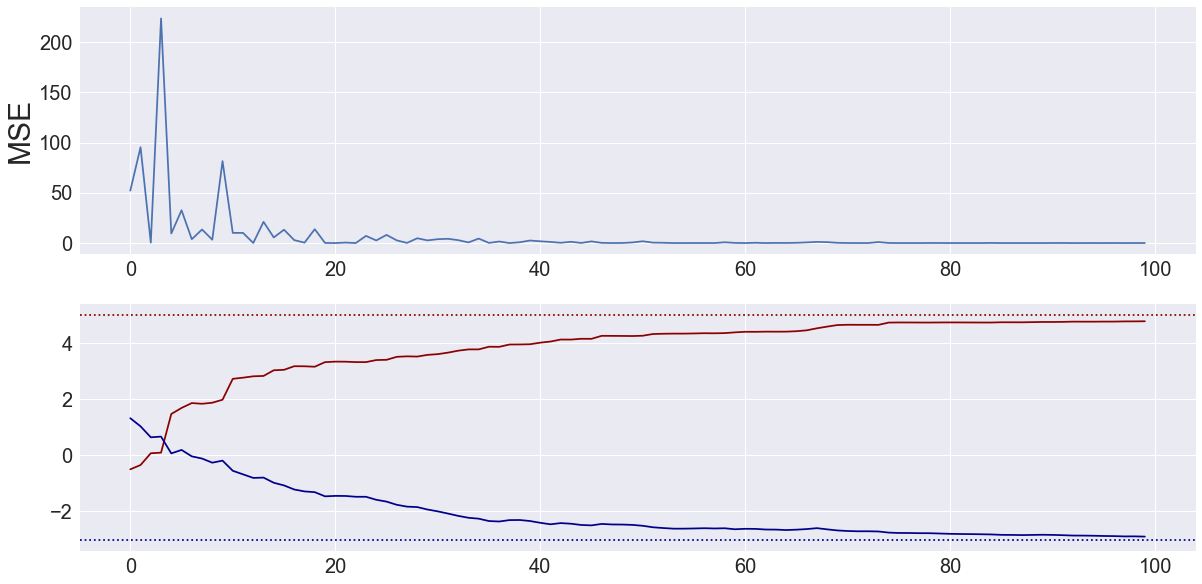

In [18]:
# visualize loss
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[0].set_ylabel('MSE', fontsize=30)
axes[0].tick_params(labelsize=20)
axes[1].axhline(y=t_w, color='darkred', linestyle=':')
axes[1].plot(w_track, color='darkred')
axes[1].axhline(y=t_b, color='darkblue', linestyle=':')
axes[1].plot(b_track, color='darkblue')
axes[1].tick_params(labelsize=20)

## Linear Regressing (feature n)

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.random.seed(1)
plt.style.use('seaborn')

# set params
n_data, n_feature = 100, 3
lr = 0.1

t_W = np.random.uniform(-3, 3, (n_feature, 1))
t_b = np.random.uniform(-3, 3, (1, ))

W = np.random.uniform(-3, 3, (n_feature, 1))
b = np.random.uniform(-3, 3, (1, ))

# generate dataset
x_data = np.random.randn(n_data, n_feature)
y_data = x_data @ t_W + t_b


In [48]:
J_track = list()
W_track, b_track = list(), list()

for data_idx, (X, y) in enumerate(zip(x_data, y_data)):
    W_track.append(W)
    b_track.append(b)
    
    # forward propagation
    pred = X @ W + b
    J = (y - pred)**2
    J_track.append(J)
 
    # jacobians
    dJ_dpred = -2*(y - pred)
    dpred_dW = X.reshape(1, -1)
    dpred_b = 1

    # backpropagation
    dJ_dW = dJ_dpred * dpred_dW
    dJ_db = dJ_dpred * dpred_db
 
 # paramter update
 # print(W.shape, dJ_dW.shape)
 # print(b.shape, dJ_db.shape)
    W = W - lr*dJ_dW.T
    b = b - lr*dJ_db
    
    
W_track = np.hstack(W_track)
b_track = np.concatenate(b_track)

### visualize

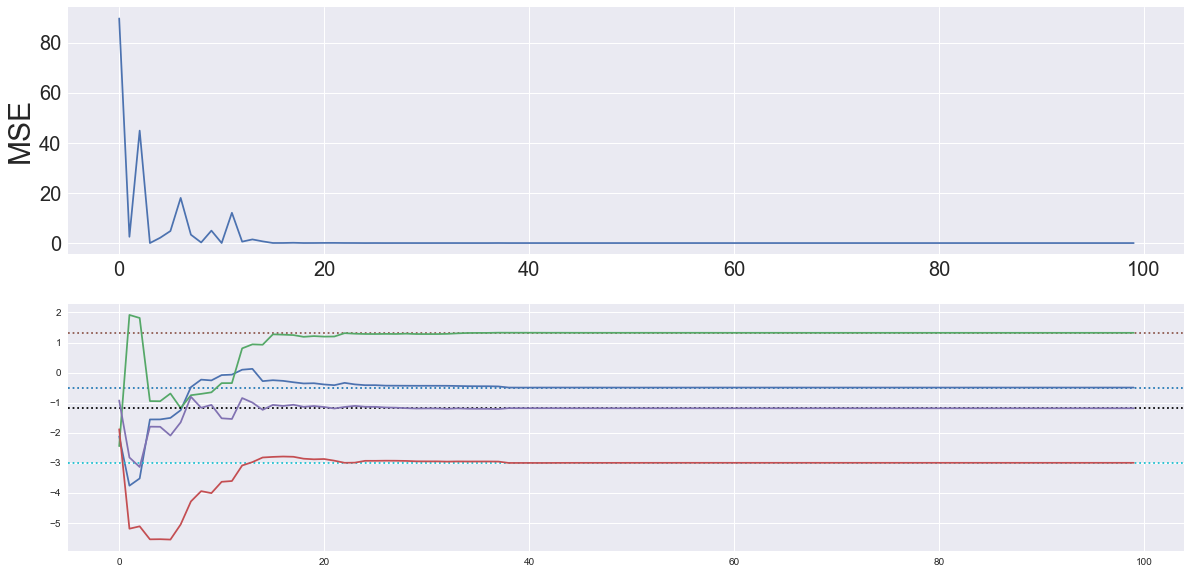

In [49]:
# visualize loss
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[0].set_ylabel('MSE', fontsize=30)
axes[0].tick_params(labelsize=20)


cmap = cm.get_cmap('tab10', lut=n_feature)
for w_idx, (t_w, w) in enumerate(zip(t_W, W_track)):
    axes[1].axhline(y=t_w, color=cmap(w_idx), linestyle=':')
    axes[1].plot(w)
axes[1].axhline(y=t_b, color='black', linestyle=':')
axes[1].plot(b_track)
axes[0].tick_params(labelsize=20)